# Processo 4Intelligence

1ª Etapa: Avaliação Técnica - Prova de Programação

Nome: Chrystopher Alves

# Parte A

Limpeza da base

# Passo 0

Importação de bibliotecas básicas

In [88]:
import pandas as pd
import numpy as np

# Passo 1

Importe o arquivo ”pmc.xlsx” pulando as três primeiras linhas.

In [89]:
base_pmc = pd.read_excel(r"pmc.xlsx", engine="openpyxl", skiprows = 3, na_values=["-"])
base_pmc.drop(4208,axis=0,inplace=True)

# Passo 2

Renomeie as colunas e as deixe na seguinte ordem: “data”, “var”, “setor” e colunas de localidades. Para essas últimas, utilize siglas (BR e siglas dos estados).

In [90]:
base_pmc.rename(columns={"Unnamed: 0":"data", "Unnamed: 1":"var", "Unnamed: 2":"setor", "Brasil":"BR", "Ceará":"CE", "Pernambuco":"PE", "Bahia":"BA", "Minas Gerais":"MG", "Espírito Santo":"ES", "Rio de Janeiro":"RJ", "São Paulo":"SP", "Paraná": "PR", "Santa Catarina":"SC", "Rio Grande do Sul": "RS", "Goiás":"GO", "Distrito Federal":"DF" }, inplace=True)

# Passo 3

Converta os valores das colunas de Brasil e UFs para que fiquem na classe numérica.

In [91]:
base_pmc.loc[:, "BR":"DF"] = base_pmc.loc[:, "BR":"DF"].apply(pd.to_numeric)

# Passo 4

Substitua os textos na coluna “var”. Faça com que assumam apenas as palavras “volume”
ou “receita”, a depender de cada linha.

In [92]:
base_pmc["var"] = base_pmc["var"].replace(["Índice de volume de vendas no comércio varejista (Número-índice)"], "volume").replace(["Índice de receita nominal de vendas no comércio varejista (Número-índice)"], "receita")

# Passo 5

Converta a coluna “data” para que ela assuma a classe própria para data. O padrão deve ser YYYY-MM-DD. (Utilize 01 quando não houver especificado o dia).

In [93]:
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

'pt_BR.utf8'

In [94]:
base_pmc['data'] = pd.to_datetime(base_pmc["data"].str.title(),format='%B %Y')

# Passo 6

Para as colunas “data” e “var”, preencha os espaços contendo “NA” com a informação que não seja ”NA”localizada imediatamente acima.

In [95]:
base_pmc['data'].fillna(method ='ffill', inplace = True)
base_pmc['var'].fillna(method ='ffill', inplace = True)

# Passo 7

Exclua todas as linhas em que a coluna “var” seja igual à “receita”

In [96]:
base_pmc.drop(base_pmc[base_pmc["var"]=="receita"].index, inplace=True)

# Parte B

Importação de bibliotecas e definição de características das fontes dos gráficos

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

# Passo 1

Utilize visualizações e estatísticas para comparar o setor de Móveis e Eletrodomésticos com os outros setores. Como a sede da empresa é em São Paulo, verifique o comportamento neste estado. (Dê maior destaque para o período da pandemia).

Para comparar o setor de Móveis e Eletrodomésticos com os outros setores, eu criei gráficos que representam cada um desses setores, com o eixo x representando o tempo e o eixo y identificando o índice. Coloquei o gráfico do setor de Móveis e Eletrodomésticos em azul para maior destaque.

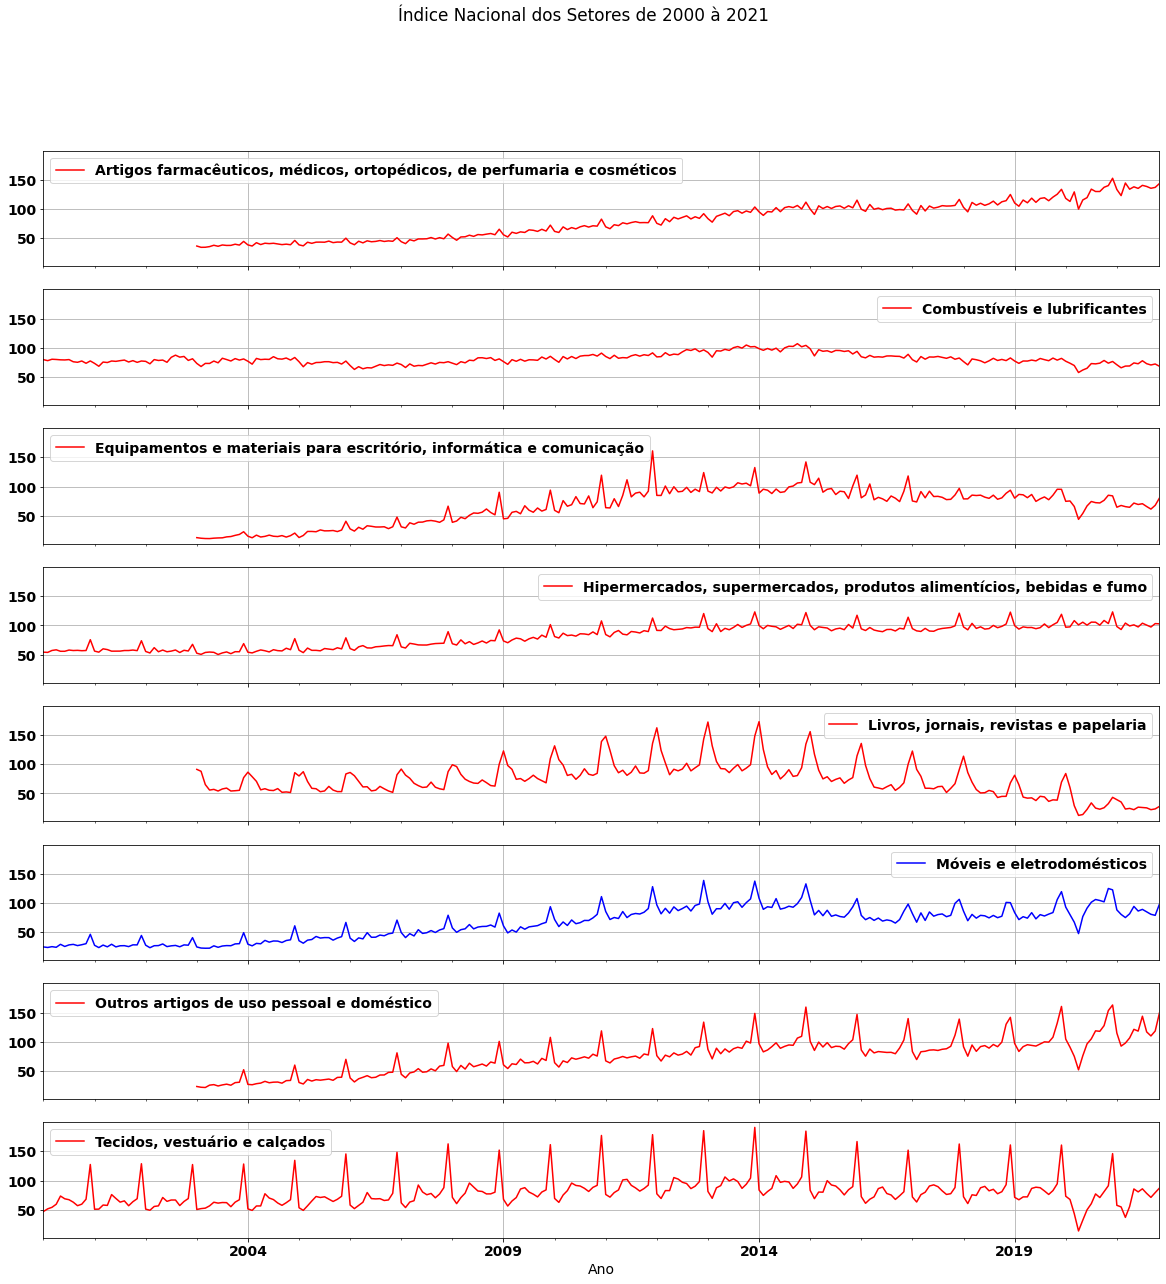

In [98]:
pmc_data_setor = base_pmc.pivot_table(index="data", columns="setor", values="BR")
pmc_data_setor.plot(subplots=True, figsize=(20,20), grid=True, title="Índice Nacional dos Setores de 2000 à 2021", sharey=True, style=['r', 'r', 'r', 'r', 'r', 'b', 'r', 'r'])
plt.xlabel("Ano")
plt.show()

Este gráfico representa a evolução do índice do setor de móveis e eletrodomésticos em São Paulo entre 2000 e 2021. Em cinza está em destaque o período da pandemia, que, de acordo com a OMS, começou em 21/03/2020 e está vigente até hoje.

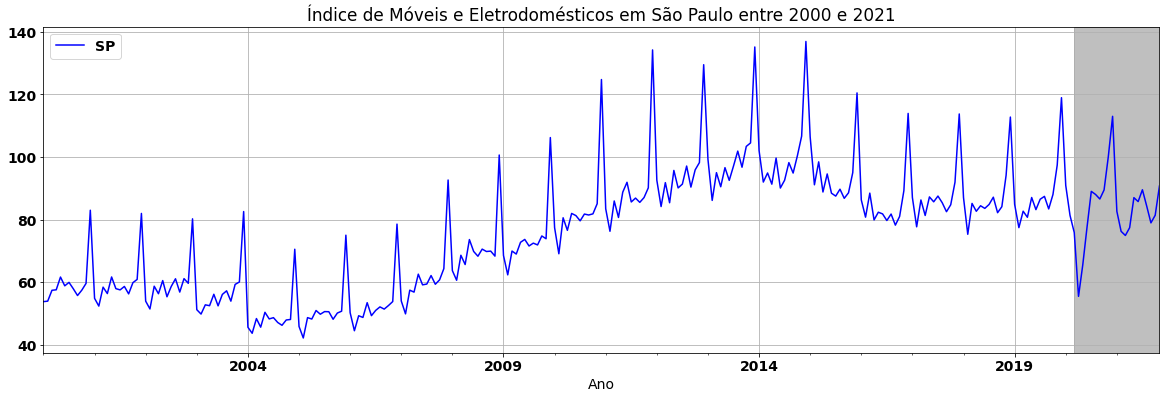

In [99]:
pmc_data_sp = base_pmc.pivot_table(index="data", values="SP")
pmc_data_sp.plot(figsize=(20,6), grid=True, title="Índice de Móveis e Eletrodomésticos em São Paulo entre 2000 e 2021", style="b")
plt.xlabel("Ano")
plt.axvspan("2020-03-21", "2021-11-01", color="grey", alpha=0.5)
plt.show()

# Passo 2

Compare visualmente o efeito da pandemia neste setor entre os estados. Observe diferenças na intensidade e no tempo para recuperação.

Os gráficos apresentam o impacto que a pandemia gerou no índice de móveis e eletrodomésticos entre os estados. O gráfico do estado de São Paulo aparece em evidência com a linha na cor azul e o período de pandemia hachurado em cinza.

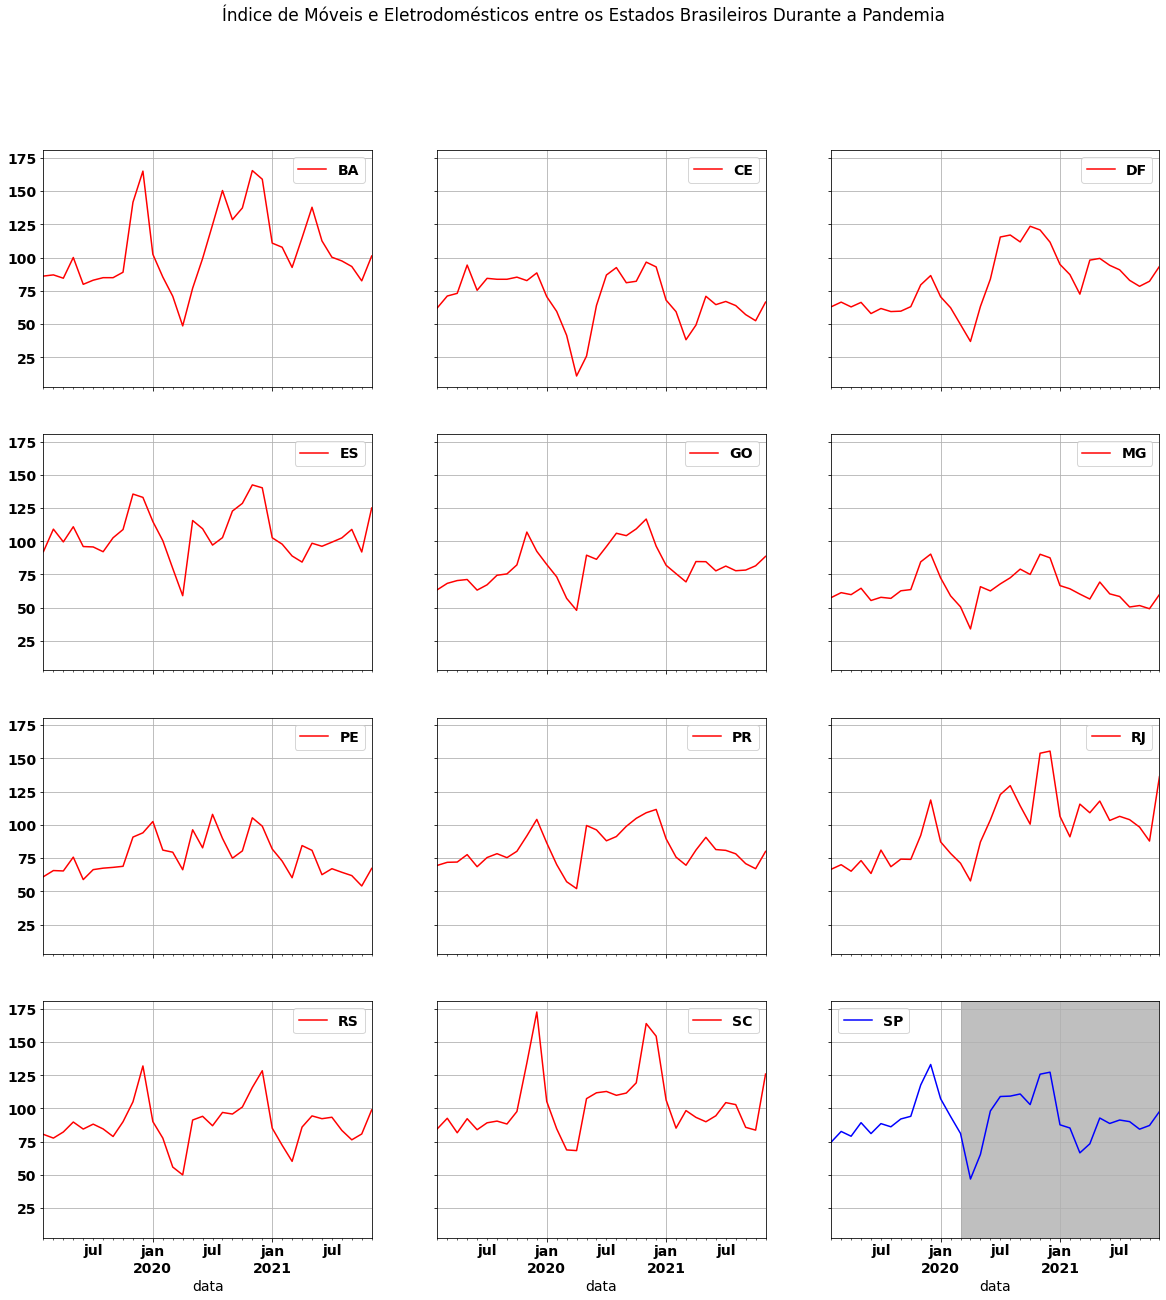

In [100]:
pmc_eletro_estados = base_pmc[(base_pmc["setor"] == "Móveis e eletrodomésticos") & (base_pmc["data"] > "2019")].pivot_table(index="data", values=base_pmc.loc[:, "CE":"DF"])
pmc_eletro_estados.plot(subplots=True, figsize=(20,20), grid=True, title="Índice de Móveis e Eletrodomésticos entre os Estados Brasileiros Durante a Pandemia", sharey=True, style=['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b'], layout=(4,3))
plt.axvspan("2020-03-21", "2021-11-01", color="grey", alpha=0.5)
plt.show()

# Passo 3

Calcule a variação percentual na fase inicial da pandemia, entre abril de 2019 e abril
de 2020, para todos os estados, dentro do setor de interesse. Mostre graficamente as
diferenças.

Este gráfico apresenta a variação percentual do índice de móveis e eletrodomésticos nos estados entre Abril de 2019 e 2020. Em azul aparece o único estado que teve variação positiva, no caso Pernambuco e em vermelho aparecem os estados que tiveram variação negativa.

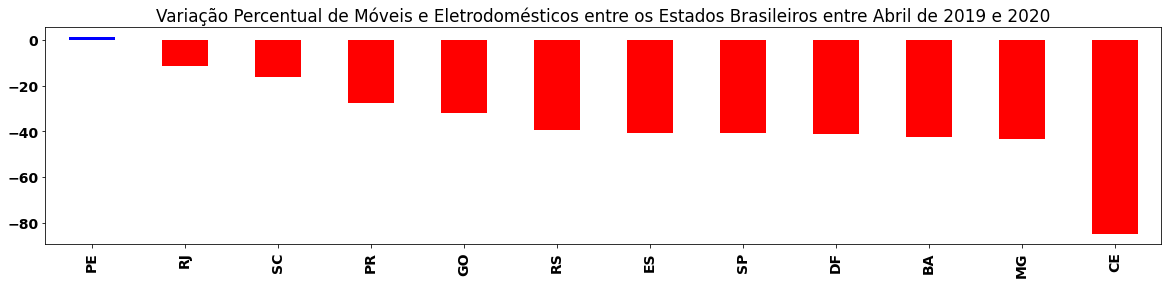

In [101]:
pmc_eletro_abril = base_pmc[(base_pmc["setor"] == "Móveis e eletrodomésticos") & (base_pmc["data"] >= "2019-04") & (base_pmc["data"] <= "2020-04")].pivot_table(index="data", values=base_pmc.loc[:, "CE":"DF"])
variacao = (((pmc_eletro_abril.loc["2020-04-01"] / pmc_eletro_abril.loc["2019-04-01"]) - 1) * 100).sort_values(ascending=False)
variacao.plot(kind="bar", figsize=(20,4), color=["b","r","r","r","r","r","r","r","r","r","r","r"], title="Variação Percentual de Móveis e Eletrodomésticos entre os Estados Brasileiros entre Abril de 2019 e 2020")
plt.show()

# Parte C

Inclusão do rendimento real médio efetivo dos trabalhos.

# Passo 1

Importe a base “rendimento_efetivo_real.csv”.

In [102]:
rendimento = pd.read_csv("rendimento_efetivo_real.csv", delimiter=";")
rendimento.drop("Unnamed: 2",axis=1,inplace=True)

# Passo 2

Renomeie as colunas para que tenhamos "data" e "renda".

In [103]:
rendimento.rename(columns={"Data":"data", "Rendimento real médio de todos os trabalhos efetivos mensais - R$ Penúltimo mês da série - Instituto Brasileiro de Geografia e Estatística, Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_RRTE12":"renda"}, inplace=True)

# Passo 3

Ajuste a coluna data para o formato YYYY-MM-DD. (Utilize 01 quando não houver especificado o dia).

In [104]:
rendimento["data"] = rendimento["data"].astype(str).apply(lambda x: x.replace('.',''))

In [105]:
rendimento["data"] = pd.to_datetime(rendimento["data"], format="%Y%m")

# Passo 4

Junte com a base anterior já organizada.

In [106]:
pmc_rendimento = base_pmc.merge(rendimento, on="data")

# Passo 5

Gere uma visualização com as duas variáveis de interesse (note que é apenas para Brasil).

Este gráfico com eixo x temporal compartilhado foi feito para comparar o rendimento real médio efetivo dos trabalhos com o índice do volume de vendas de móveis e eletrodomésticos no Brasil. Em vermelho e com eixo y à direita está o rendimento e em azul com o eixo y à esquerda, está o índice.

In [107]:
pmc_rendimento_pivot = pmc_rendimento[pmc_rendimento["setor"] == "Móveis e eletrodomésticos"].pivot_table(index="data", values=["BR", "renda"])

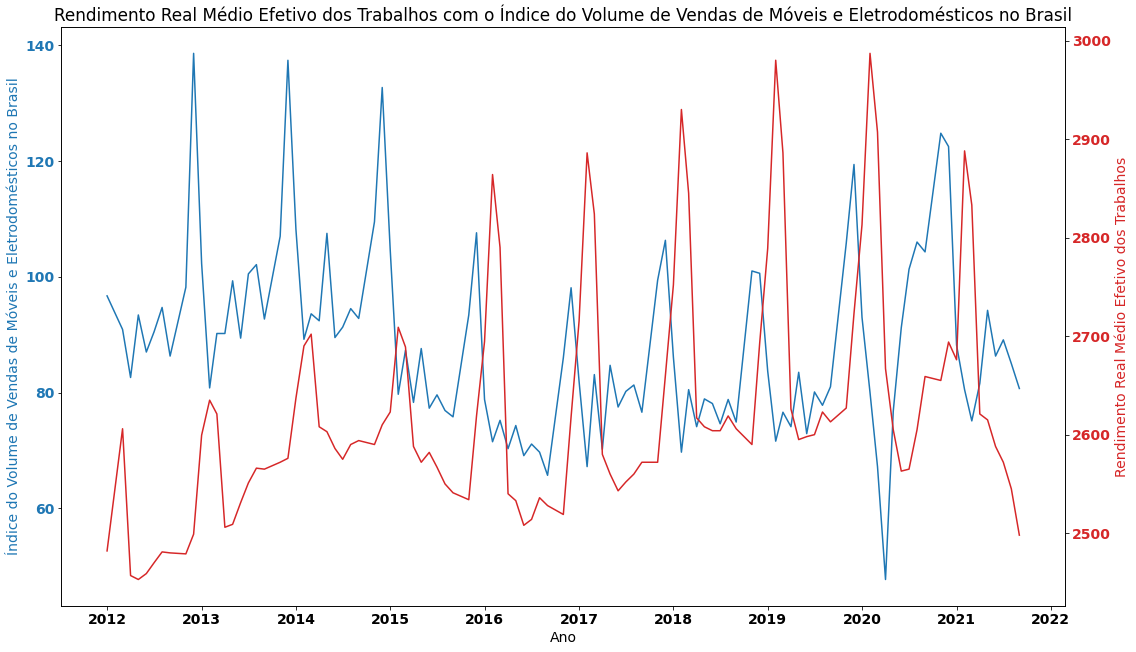

In [108]:
plt.rcParams["figure.figsize"] = [16,9]
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Índice do Volume de Vendas de Móveis e Eletrodomésticos no Brasil', color=color)
ax1.plot(pmc_rendimento_pivot.index, pmc_rendimento_pivot["BR"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Rendimento Real Médio Efetivo dos Trabalhos', color=color)  # we already handled the x-label with ax1
ax2.plot(pmc_rendimento_pivot.index, pmc_rendimento_pivot["renda"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Rendimento Real Médio Efetivo dos Trabalhos com o Índice do Volume de Vendas de Móveis e Eletrodomésticos no Brasil")
plt.show()

# Passo 6

Crie um modelo estatístico que estime a relação entre volume de vendas de móveis e
eletrodomésticos com o rendimento real médio efetivo.

O gráfico de dispersão abaixo representa o rendimento real médio efetivo dos trabalhos comparado ao índice do volume de vendas de móveis e eletrodomésticos no Brasil.

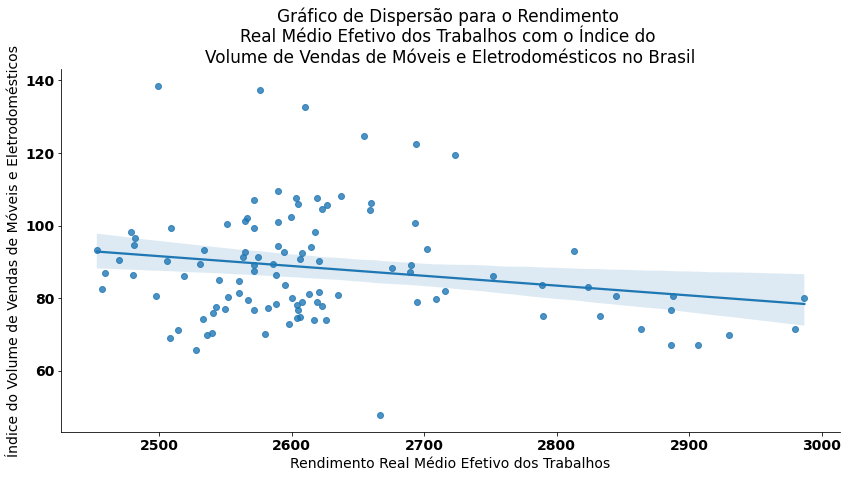

In [111]:
sns.lmplot(x="renda", y="BR",data=pmc_rendimento_pivot,aspect=2,height=6)
plt.xlabel('Rendimento Real Médio Efetivo dos Trabalhos')
plt.ylabel('Índice do Volume de Vendas de Móveis e Eletrodomésticos')
plt.title('Gráfico de Dispersão para o Rendimento \nReal Médio Efetivo dos Trabalhos com o Índice do \nVolume de Vendas de Móveis e Eletrodomésticos no Brasil')
plt.show()

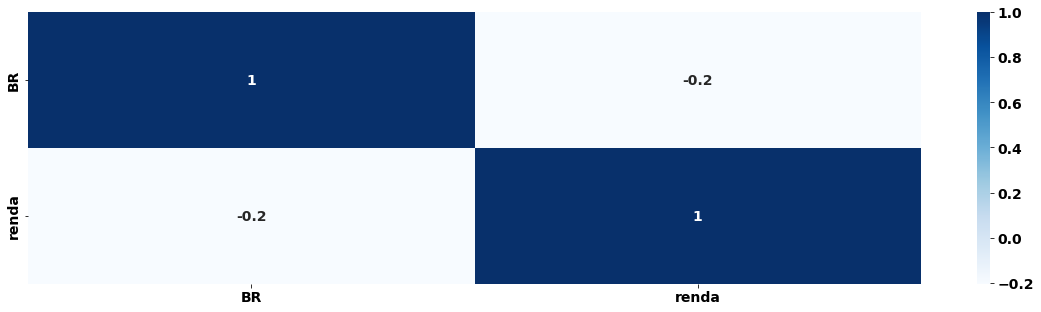

In [112]:
plt.rcParams["figure.figsize"] = [20,5]
corr = pmc_rendimento_pivot.corr()
sns.heatmap(corr, cmap = 'Blues', annot= True)
plt.show()